In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Geração randômica de dados
np.random.seed(42)
alunos = [f'Aluno {i+1:02d}' for i in range(50)]
disciplinas = ['Front-end', 'Back-end', 'Cibersegurança', 'Big Data', 
               'Java', 'Python', '.NET', 'PHP', 'C#']

dados = {
    'nome_aluno': np.random.choice(alunos, size=200),  
    'disciplina': np.random.choice(disciplinas, size=200),
    'nota_prova': np.round(np.random.uniform(0, 10, size=200), 2),
    'nota_trabalho': np.round(np.random.uniform(0, 10, size=200), 2),
    'frequencia': np.random.randint(50, 100, size=200)  # Percentual de frequência
}

# Criação da média final
dados['média_final'] = np.round((dados['nota_prova'] * 0.5) + (dados['nota_trabalho'] * 0.5), 2)

# 2. Criação do DataFrame
df_alunos = pd.DataFrame(dados)

# Agrupa por aluno e disciplina para obter a média final de cada um (para o cálculo da correlação)
tabela = df_alunos.pivot_table(
    index='nome_aluno',
    columns='disciplina',
    values='média_final',
    aggfunc='mean'
)



# Exibição dos primeiros registros
print(df_alunos.head())

  nome_aluno disciplina  nota_prova  nota_trabalho  frequencia  média_final
0   Aluno 39     Python        7.26           6.85          72         7.06
1   Aluno 29        PHP        9.76           1.63          59         5.70
2   Aluno 15         C#        5.16           9.11          93         7.14
3   Aluno 43   Big Data        3.23           8.23          51         5.73
4   Aluno 08  Front-end        7.95           9.50          62         8.72


In [15]:
# Função para análise descritiva completa dos alunos
def analise_descritiva(dados, nome):
    print(f'\n=== Análise da Disciplina {nome} ===')
    print(f'Média das notas: {dados.mean():.4f}')
    print(f'Mediana das notas: {dados.median():.4f}')
    print(f'Desvio Padrão: {dados.std():.4f}')
    print(f'Variância: {dados.var():.4f}')
    print(f'Valor Mínimo: {dados.min():.4f}')
    print(f'Valor Máximo: {dados.max():.4f}')

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.4f}')
    print(f'Q2/Mediana (50%): {q2:.4f}')
    print(f'Q3 (75%): {q3:.4f}')
    print(f'IQR: {iqr:.4f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.4f}')
    print(f'Limite Superior: {limite_sup:.4f}')

    outliers = dados[(dados < limite_inf) | (dados > limite_sup)]
    print(f'\nOutliers Detectados: {outliers.tolist()}')

    assimetria = dados.skew()
    if -0.5 <= assimetria <= 0.5:
        print(f'\nA distribuição {assimetria:.4f} é simétrica')
    elif assimetria > 0.5:
        print(f'\nA distribuição assimétrica {assimetria:.4f} é positiva.')
    else:
        print(f'\nA distribuição assimétrica {assimetria:.4f} é negativa.')

    curtose = dados.kurtosis()
    if 2.5 <= curtose <= 3.5:
        print(f'\nA curtose {curtose:.4f} é mesocúrtica.')
    elif curtose > 3.5:
        print(f'\nA curtose {curtose:.4f} é leptocúrtica.')
    else:
        print(f'\nA curtose {curtose:.4f} é platicúrtica.')

# Aplicando a função aos dados dos alunos
for disciplina in df_alunos['disciplina'].unique():
    notas_disciplina = df_alunos[df_alunos['disciplina'] == disciplina]['média_final'].astype(float)
    analise_descritiva(notas_disciplina, disciplina)

# Calcula a matriz de correlação entre as disciplinas
correlacao_disciplinas = tabela.corr()

# Exibe a matriz de correlação
print('\n=== Correlação entre as Disciplinas ===')
print(correlacao_disciplinas.round(4))


=== Análise da Disciplina Python ===
Média das notas: 5.1228
Mediana das notas: 5.0600
Desvio Padrão: 1.7760
Variância: 3.1543
Valor Mínimo: 2.0100
Valor Máximo: 8.5200

Medidas de Posição:
Q1 (25%): 3.9000
Q2/Mediana (50%): 5.0600
Q3 (75%): 6.0300
IQR: 2.1300

Limites para Outliers
Limite Inferior: 0.7050
Limite Superior: 9.2250

Outliers Detectados: []

A distribuição 0.1207 é simétrica

A curtose -0.6631 é platicúrtica.

=== Análise da Disciplina PHP ===
Média das notas: 4.4800
Mediana das notas: 4.7500
Desvio Padrão: 2.1909
Variância: 4.8002
Valor Mínimo: 0.5200
Valor Máximo: 9.3400

Medidas de Posição:
Q1 (25%): 2.9375
Q2/Mediana (50%): 4.7500
Q3 (75%): 5.5725
IQR: 2.6350

Limites para Outliers
Limite Inferior: -1.0150
Limite Superior: 9.5250

Outliers Detectados: []

A distribuição 0.4968 é simétrica

A curtose 0.1986 é platicúrtica.

=== Análise da Disciplina C# ===
Média das notas: 4.9406
Mediana das notas: 5.0800
Desvio Padrão: 1.7441
Variância: 3.0419
Valor Mínimo: 0.9200
Va

C:\Users\sathl\AppData\Local\Temp\ipykernel_16660\1840291063.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(dados_boxplot, labels=labels_disciplinas, patch_artist=True, medianprops=dict(color='black'))


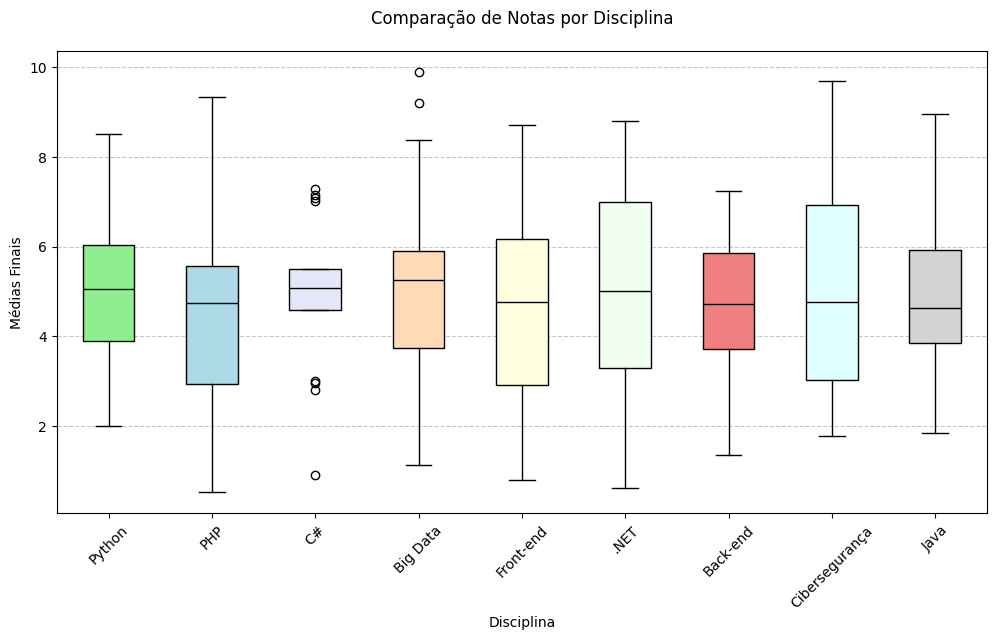

In [11]:
#Gráficos de Boxplot

# Preparação dos dados para o boxplot
dados_boxplot = [df_alunos[df_alunos['disciplina'] == disciplina]['média_final'] for disciplina in df_alunos['disciplina'].unique()]
labels_disciplinas = df_alunos['disciplina'].unique()

# Criando o gráfico boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(dados_boxplot, labels=labels_disciplinas, patch_artist=True, medianprops=dict(color='black'))

# Customização de cores para diferenciar disciplinas
colors = ['lightgreen', 'lightblue', 'lavender', 'peachpuff', 'lightyellow', 'honeydew', 'lightcoral', 'lightcyan', 'lightgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Ajustes estéticos
plt.title("Comparação de Notas por Disciplina", pad=20)
plt.ylabel("Médias Finais")
plt.xlabel("Disciplina")
plt.xticks(rotation=45)  # Inclinar os rótulos para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

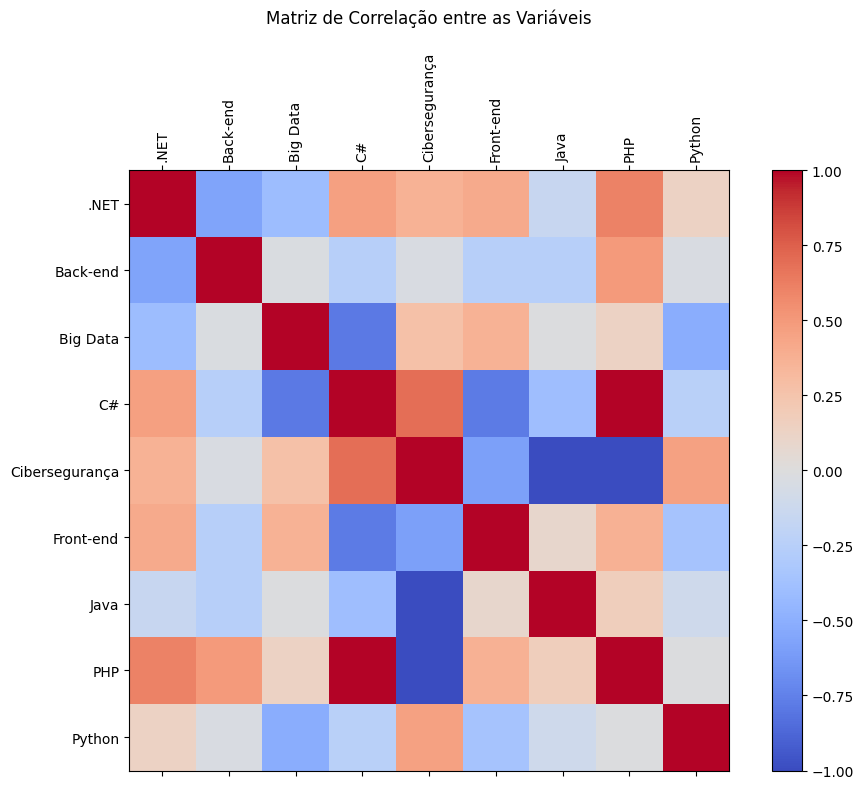

In [16]:
#Gráfico de Correlação

# Cria o mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlacao_disciplinas, cmap='coolwarm')

# Adiciona a barra de cores
fig.colorbar(cax)

# Define os rótulos dos eixos
ax.set_xticks(range(len(correlacao_disciplinas.columns)))
ax.set_yticks(range(len(correlacao_disciplinas.columns)))
ax.set_xticklabels(correlacao_disciplinas.columns, rotation=90)
ax.set_yticklabels(correlacao_disciplinas.columns)

plt.title("Matriz de Correlação entre as Variáveis", pad=20)
plt.tight_layout()
plt.show()